In [2]:
import dextr
from dataloaders import helpers as helpers
import requests
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import io

Constructing ResNet model...
Dilations: (2, 4)
Number of classes: 1
Number of Input Channels: 4
Initializing classifier: PSP


In [3]:
# https://stackoverflow.com/questions/43396282/cursor-location-and-pixel-value-in-a-jupyter-notebook-inline-image
# using this to note down extreme points
%matplotlib notebook

In [4]:
image_url = "https://raw.githubusercontent.com/scaelles/DEXTR-PyTorch/master/ims/dog-cat.jpg"
extreme_points = [[93, 24], [334, 165], [60, 364], [0, 273]]

In [5]:
response = requests.get(image_url)
image = np.array(Image.open(io.BytesIO(response.content)))

<IPython.core.display.Javascript object>


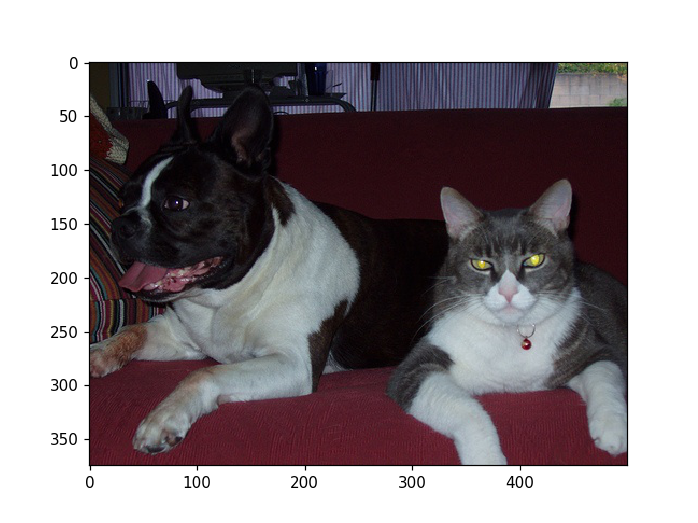

In [6]:
plt.imshow(image)

In [7]:
plt.close()

In [8]:
def visualise(result, image):
    bbox, mask, class_prediction = result
    plt.imshow(helpers.overlay_masks(image / 255, [mask]))
    x_min, y_min, x_max, y_max = bbox
    width = x_max - x_min
    height = y_max - y_min
    rect = patches.Rectangle((x_min, y_min),width,height,linewidth=1,edgecolor='r',facecolor='none')
    ax = plt.gca()
    ax.add_patch(rect)
    plt.text(x_max/2, y_max/2, class_prediction, bbox=dict(facecolor='red', alpha=0.5))
    print(class_prediction)

In [9]:
results = dextr.dextr_helper(image_url, extreme_points)

/home/arshdeep/workspace/DEXTR-PyTorch/dextr.py:90: RuntimeWarning: overflow encountered in exp
  pred = 1 / (1 + np.exp(-pred))


<IPython.core.display.Javascript object>


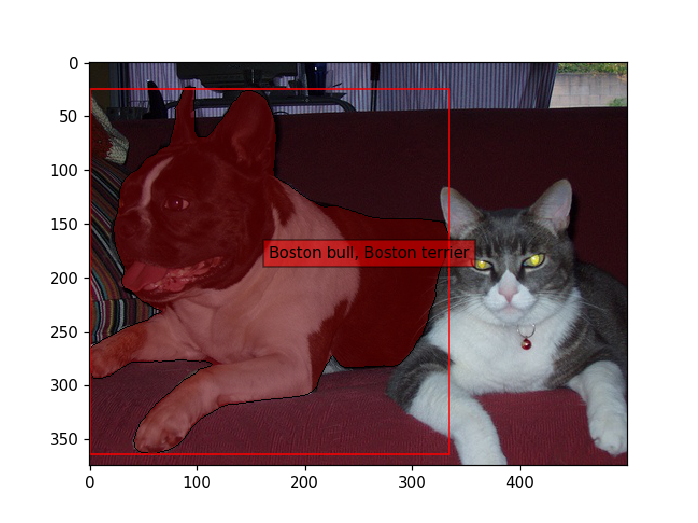

Boston bull, Boston terrier


In [10]:
visualise(results, image)

In [11]:
plt.close()

In [12]:
cat_pts = [[367, 372], [280, 300], [332, 114], [498, 233]]

In [13]:
results = dextr.dextr_helper(image_url, cat_pts)

<IPython.core.display.Javascript object>


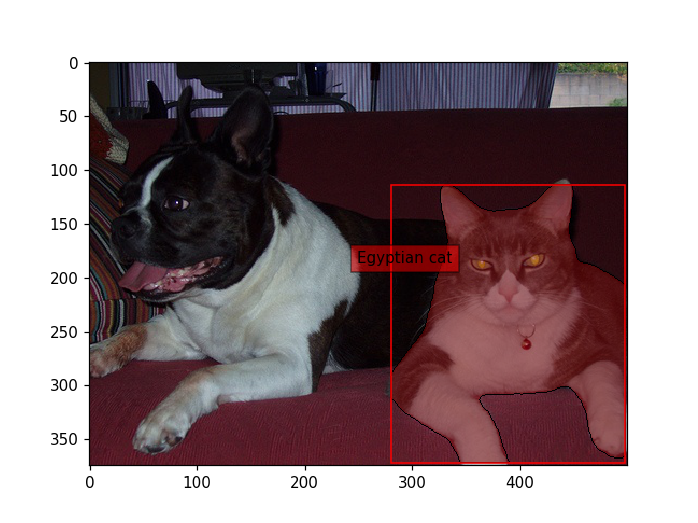

Egyptian cat


In [14]:
visualise(results, image)

In [15]:
plt.close()